In [194]:
import numpy as np
import matplotlib.pyplot as plt

## Thrust curve from graph
Graph and data points from https://www.rocketreviews.com/cti-21062-o3400-im-p.html

![f15 curve](img/21062O3400-P.png)

In [195]:
# after a lot of eyeballing the graph above
data = np.array([
    [0.0, 0.0],
    [0.1, 4500],
    [0.2, 4600],
    [0.3, 4500],
    [0.4, 4400],
    [0.5, 4400],
    [0.6, 4450],
    [0.7, 4500],
    [0.8, 4550],
    [0.9, 4600],
    [1.0, 4650],
    [1.1, 4700],
    [1.2, 4750],
    [1.3, 4800],
    [1.4, 4820],
    [1.5, 4800],
    [1.6, 4750],
    [1.7, 4700],
    [1.8, 4650],
    [1.9, 4600],
    [2.0, 4550],
    [2.1, 4500],
    [2.2, 4480],
    [2.3, 4450],
    [2.4, 4420],
    [2.5, 4400],
    [2.6, 4380],
    [2.7, 4350],
    [2.8, 4300],
    [2.9, 4250],
    [3.0, 4200],
    [3.1, 4150],
    [3.2, 4100],
    [3.3, 4050],
    [3.4, 4000],
    [3.5, 3950],
    [3.6, 3900],
    [3.7, 3850],
    [3.8, 3800],
    [3.9, 3700],
    [4.0, 3600],
    [4.1, 3500],
    [4.2, 3400],
    [4.3, 3300],
    [4.4, 3200],
    [4.5, 3100],
    [4.6, 3000],
    [4.7, 2900],
    [4.8, 2800],
    [4.9, 2700],
    [5.0, 2600],
    [5.1, 2500],
    [5.2, 2400],
    [5.3, 2300],
    [5.4, 2200],
    [5.5, 2100],
    [5.6, 2000],
    [5.7, 1800],
    [5.8, 1500],
    [5.9, 1000],
    [6.0, 0]
])

time = data[:, 0]
thrust = data[:, 1]

In [196]:
# interpolate to fill in gaps
time_interpolated = np.linspace(time.min(), time.max(), num=500)
thrust_interpolated = np.interp(time_interpolated, time, thrust)

In [197]:
# add noise
noise = np.random.normal(0, 20, thrust_interpolated.shape)

# less noise from 0-1.5s
less_noise_indices = np.where(time_interpolated <= 2)[0]
thrust_noisy = thrust_interpolated.copy()
thrust_noisy[less_noise_indices] += noise[less_noise_indices]

# more noise after 1.5s
more_noise_indices = np.where(time_interpolated > 2)[0]
thrust_noisy[more_noise_indices] += 1.5 * noise[more_noise_indices]

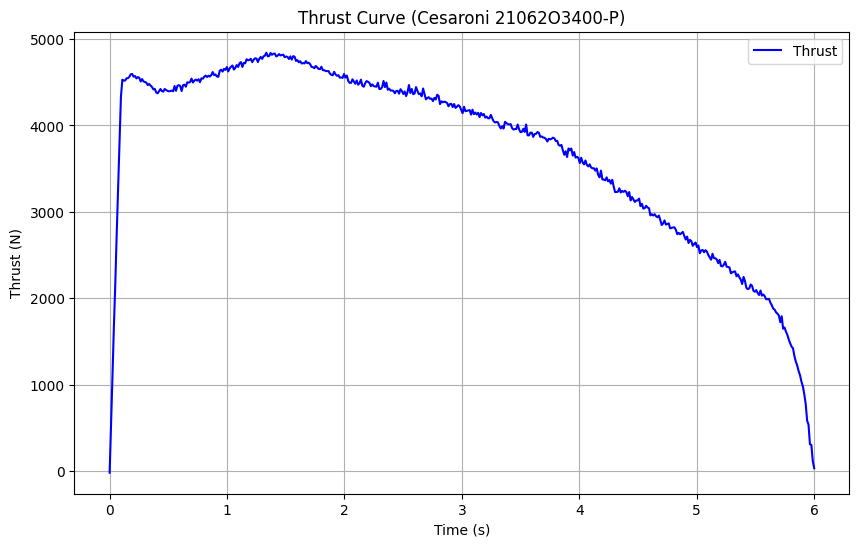

In [198]:
# plot thrust curve
plt.figure(figsize=(10, 6))
plt.plot(time_interpolated, thrust_noisy, label='Thrust', color='blue')
# plt.scatter(time, thrust, color='red')
plt.title('Thrust Curve (Cesaroni 21062O3400-P)')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.grid()
plt.show()

In [199]:
print(len(thrust_noisy))

500


In [200]:
# save thrust curve (i'm not typing out that long name)
with open('profiles/P_thrust.npy', 'wb') as f:
    np.save(f, thrust_noisy)

In [201]:
# resample the thrust curve to match simulation length
total_simulation_time = 30 # s
num_simulation_steps = 3001
time_simulation = np.linspace(0, total_simulation_time, num_simulation_steps)

# create new thrust curve array
thrust_simulation = np.zeros(num_simulation_steps)

In [202]:
# map the thrust data to the duration of the thrust of the simulation
# get the proportion of the end time relative to the total simulation time and multiply it with the number of steps
end_time = time_interpolated.max()
num_thrust_steps = int(num_simulation_steps * (end_time / total_simulation_time))
time_thrust = np.linspace(0, end_time, num_thrust_steps)

# takes each value of time_thrust, find the corresponding interval in time_interpolated,
# then perform linear interpolation to calculate specific thrust value at that specific time
thrust_resampled = np.interp(time_thrust, time_interpolated, thrust_noisy) 

In [203]:
# insert resampled thrust data into simulation thrust curve
thrust_simulation[:num_thrust_steps] = thrust_resampled

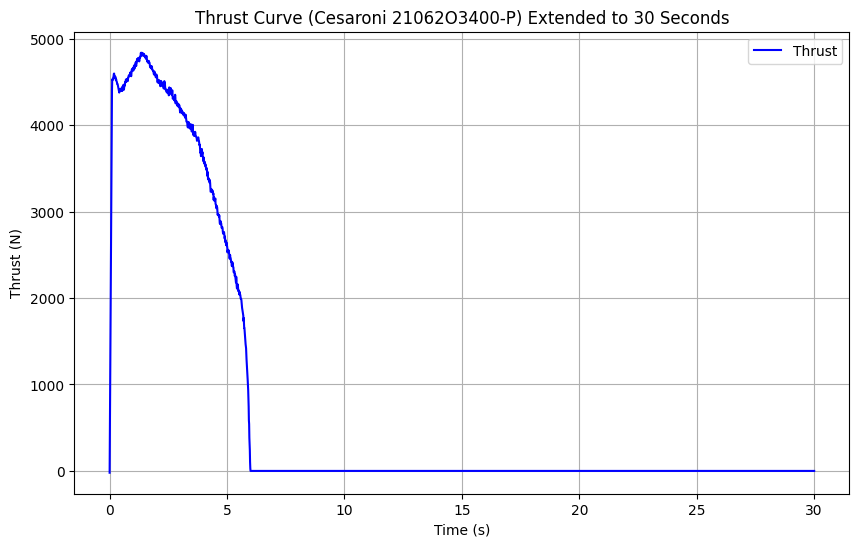

3001


In [204]:
plt.figure(figsize=(10, 6))
plt.plot(time_simulation, thrust_simulation, label='Thrust', color='blue')
plt.title('Thrust Curve (Cesaroni 21062O3400-P) Extended to 30 Seconds')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.grid()
plt.show()

print(len(thrust_simulation))

In [205]:
# save extended thrust curve
with open('profiles/P_thrust_extended.npy', 'wb') as f:
    np.save(f, thrust_simulation)